# Dimensionality Reduction: Principal Component Analysis (PCA)

## Curse of Dimensionality
Many ML tasks use thousands or millions of features for each training instance. This can make training slow and it can be much harder to find a good solution. This problem is called the *curse of dimensionality*. Luckily, for most real-world problems, it's possible to reduce the number of features.

Reducing dimensionality does lose some information (like compressing an image can degrade quality), so it could make your system perform worse. It also makes pipelines more complex and harder to maintain. But it could filter out some noise or unneccesarry details, possibly resulting in higher performance. Generally, that doesn't happen and the main benefit is that it speeds up training. It's also great for data visualization. 

## Projection & Manifold Learning
There are 2 main approaches to reducing dimensionality: projection and Manifold Learning.

### Manifold Learning
 We don't cover manifold learning in this class but very briefly: a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space (think of a swiss roll). Many dimensionality reduction algorithms work by: (1) modeling the *manifold* that the training instances are on, and (2) using the *manifold assumption* that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold, which implies (3) that the task will be simpler if expressed in the lower-dimensional space of the manifold. The problem is the assumption in (3) doesn't always hold. If you imagine a swiss roll and we unroll it, maybe we will get a perfectly split dataset with an easy decision boundary, but usually we don't.  

### Projection
The main idea behind projection is that in most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are nearly constant, while others are highly correlated. Thus, all training instances actually lie within (or close to) a much lower-dimensional subspace of the higher-dimensional space. 

### Projection Visualization
We'll create 2 plots. The first shows a 3D dataset whose instances lie close to a 2D subspace. The second plot shows the 2D dataset created by projecting every training instance perpendicularly onto the subspace. This reduces the dataset's dimensionality from 3D to 2D. Also note that the axes correspond to new features $z_1$ and $z_2$ (the coordinates of the projections on the plane).  


In [1]:
# Build a 3D dataset
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [2]:
# PCA in Scikit-Learn is easy to use, with mean-centering built in
from sklearn.decomposition import PCA

# Create a PCA model with 2 components
pca = PCA(n_components = 2)


In [7]:
# Use the correct fit method to both fit the model with X AND apply dimensionality reduction on X
# This is the projection of X to 2D space
X2D = pca.fit_transform(X)

In [8]:
# Print the principal components of the PCA object
pca.singular_values_

array([6.77645005, 2.82403671])

In [9]:
# Print the explained variance ratio
# You should see that dimension 1 explains 84.2% of the variance
#     and dimension 2 explains 14.6%
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [10]:
# Recover the 3D points that were projected onto the plane (PCA 2D subspace)
# This transforms the data back to its original space
X3D_inv = pca.inverse_transform(X2D)

In [11]:
# Utility classes to draw 3D arrows (taken from Stack Overflow)
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [12]:
# Plane as a function of x & y 
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

<ipython-input-13-730a84588d0a>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
<ipython-input-11-13d5da6fca24>:12: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


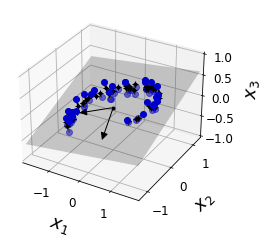

In [13]:
# Plot the 3D dataset, the plane and the projections onto that plane
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

# Note: Matplotlib 3.0.0 has a bug and does not display 3D graphs properly
plt.show()

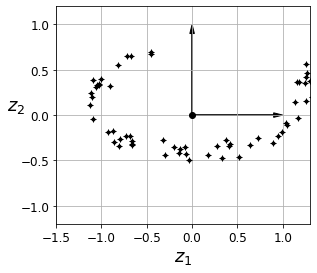

In [14]:
# View the 2D projection (after PCA was used)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)


## Principal Component Analysis (PCA)
PCA is the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data. Then it projects the data onto that hyperplane. 

### Preserving the Variance
Before you can project the training dataset onto a lower-dimensional hyperplane, you first have to choose the correct hyperplane. 

The figures created below show a simple 2D dataset (left) with 3 different axes (one-dimensional hyperplanes), represented by the solid line, dashed line, and dotted line. The figure on the right is the projection of the dataset onto each of these axes. The projection onto the solid line preserves the maximum variance, the projection onto the dashed line axis has an intermediate amount of variance, and the projection onto the dotted line axis preserves very little variance. 

We would select the axis that preserves the maximum amount of variance, because it will most likely lose less information than the other projections. This axis will also minimize the mean squared distance between the original dataset and its projection onto that axis. 

### Principal Components 
PCA identifies the axis that accounts for the largest amount of variance in the training dataset (for example, the solid line). Then it finds a second axis, orthogonal to the first axis, that accounts for the largest amount of remaining variance. If we had more dimensions in our dataset, PCA would then find a 3rd axis, orthogonal to both the first and second; this can be repeated for as many axes as the number of dimensions in the dataset. 

You can find the PCs of the dataset by using a matrix factorization technique called *Singular Value Decomposition (SVD)*. SVD decomposes the training matrix $X$ into a dot product of 3 matrices: $U \cdot \Sigma \cdot V^T$. $V^T$ contains the PCs that we need. 

PCA assumes that the dataset is centered around the origin. Scikit-Learn's PCA automatically centers the data for you. If you use SVD to implement PCA yourself, you have to center the data first. 

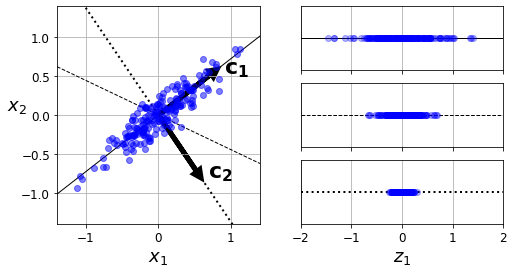

In [15]:
# Visualize the variance, axes, and projections
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

### Choosing the Right Number of Dimensions
It's common to choose the number of dimensions that will add up to a large portion of the variance, usually 95%. Unless you're reducing  dimensionality for data visualization, in which case you should use 2 or 3 dimensions. 

In [16]:
# Create a default PCA model
pca = PCA()

In [17]:
# Use pca to fit the X dataset
pca.fit(X)


PCA()

In [18]:
# Use numpy's cumsum method to total up the explained variance ratio of the pca model
total_var = np.cumsum(pca.explained_variance_ratio_  )
print(total_var)

[0.95369864 1.        ]


In [22]:
# Find d: the number of dimensions required to preserve 95% of the training data's variance
d = np.argmax(total_var >=   0.95) + 1
print(d)

1


In [23]:
# You could create a new PCA model with n_components = d
# But with Scikit-Learn you can just initialize the PCA model 
#     by specifying n_components to be a float between 0.0 and 1.0
#     indicating the variance ratio you want to keep
pca = PCA(n_components = d)


In [25]:
# Fit and reduce dimensions of X
X_reduced = pca.fit_transform(X)
print(X_reduced)

[[-8.96088137e-01]
 [-4.53603363e-02]
 [ 1.38359166e-01]
 [ 4.16315780e-02]
 [ 2.18583744e-02]
 [ 6.53868464e-01]
 [-4.45218566e-01]
 [-2.52100754e-02]
 [ 2.74828447e-01]
 [-4.89804685e-01]
 [ 5.91772943e-01]
 [-7.44460369e-01]
 [ 5.12230114e-01]
 [-3.13266691e-01]
 [ 3.83765553e-01]
 [-3.77664930e-01]
 [ 6.22192127e-01]
 [ 4.05843018e-01]
 [ 4.62900292e-01]
 [-5.62638042e-01]
 [ 8.09046208e-01]
 [ 1.80719622e-01]
 [ 2.98447518e-01]
 [ 4.35729072e-01]
 [ 1.12339132e+00]
 [-5.09329756e-01]
 [-5.57383436e-01]
 [-7.42300017e-01]
 [-4.19950471e-01]
 [ 3.04360690e-01]
 [-5.27822154e-01]
 [ 9.38906116e-02]
 [ 3.35918853e-01]
 [-7.52638095e-02]
 [-2.24065944e-01]
 [ 5.09402619e-01]
 [ 7.24520511e-02]
 [-2.44318685e-01]
 [-3.23087658e-01]
 [ 6.93739438e-01]
 [ 6.83626747e-01]
 [-3.06255432e-01]
 [-7.60306544e-02]
 [ 1.28713987e-02]
 [ 1.45854192e+00]
 [ 2.95510472e-01]
 [ 4.78043426e-01]
 [ 2.86468892e-01]
 [-3.38708502e-01]
 [ 1.44466110e-01]
 [-4.35369951e-01]
 [ 3.76189231e-02]
 [-6.1796479

Scikit-Learn implements a variety of PCA techniques, like Incremental PCA, Randomized PCA, and Kernel PCA. 